**Document Similarity Analysis**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from google.colab import files

**Document upload**

In [2]:
uploaded = files.upload()

print(f"\n✓ {len(uploaded)} files uploaded successfully!")
for filename in uploaded.keys():
    print(f"  - {filename}")
print()

Saving doc1.txt.txt to doc1.txt.txt
Saving doc2.txt.txt to doc2.txt.txt
Saving doc3.txt.txt to doc3.txt.txt
Saving doc4.txt.txt to doc4.txt.txt
Saving doc5.txt.txt to doc5.txt.txt

✓ 5 files uploaded successfully!
  - doc1.txt.txt
  - doc2.txt.txt
  - doc3.txt.txt
  - doc4.txt.txt
  - doc5.txt.txt



In [3]:
documents = []
doc_names = []

for filename in sorted(uploaded.keys()):
    with open(filename, 'r', encoding='utf-8') as f:
        content = f.read()
        documents.append(content)
        doc_names.append(filename)
    print(f"✓ Loaded: {filename} ({len(content)} characters)")

print(f"\n✓ Total documents loaded: {len(documents)}\n")

✓ Loaded: doc1.txt.txt (1402 characters)
✓ Loaded: doc2.txt.txt (1293 characters)
✓ Loaded: doc3.txt.txt (1369 characters)
✓ Loaded: doc4.txt.txt (1469 characters)
✓ Loaded: doc5.txt.txt (0 characters)

✓ Total documents loaded: 5



**Display document Character**

In [5]:
print("Document Previews:")
print("-" * 80)
for i, (name, doc) in enumerate(zip(doc_names, documents), 1):
    print(f"\n{i}. {name}:")
    print(f"   {doc[:200]}...")
print("\n")

Document Previews:
--------------------------------------------------------------------------------

1. doc1.txt.txt:
   Man's Search for Meaning by Viktor Frankl explores finding purpose in life through suffering and survival. The book recounts Frankl's experiences as a prisoner in Nazi concentration camps and his obse...

2. doc2.txt.txt:
   Being Mortal by Atul Gawande examines how doctors and society approach aging and death. The book argues that the medical field overemphasizes survival at the expense of patients' well-being and qualit...

3. doc3.txt.txt:
   The Denial of Death by Ernest Becker argues that the basis of human civilization is our desire to ignore our mortality. The book contends that death anxiety is the fundamental driver of human life and...

4. doc4.txt.txt:
   Mindset by Carol Dweck details research on implicit theories of intelligence and introduces the concepts of growth and fixed mindsets. People fall into two mindsets regarding their abilities and intel...


**Text Processing**

In [7]:
def preprocess_text(text):
    """Preprocess text for analysis"""

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

processed_docs = [preprocess_text(doc) for doc in documents]

print("✓ Text preprocessing completed!")
print(f"  - Converted to lowercase")
print(f"  - Removed special characters")
print(f"  - Removed extra whitespace")
print()

✓ Text preprocessing completed!
  - Converted to lowercase
  - Removed special characters
  - Removed extra whitespace



**Create TF-IDF Vectors**

In [9]:
vectorizer = TfidfVectorizer(
    min_df=1,
    max_df=1.0,
    stop_words='english',
    lowercase=True
)


tfidf_matrix = vectorizer.fit_transform(processed_docs)

print(f"✓ TF-IDF matrix created!")
print(f"  - Matrix shape: {tfidf_matrix.shape}")
print(f"  - Number of documents: {tfidf_matrix.shape[0]}")
print(f"  - Vocabulary size: {tfidf_matrix.shape[1]} unique terms")
print()

✓ TF-IDF matrix created!
  - Matrix shape: (5, 330)
  - Number of documents: 5
  - Vocabulary size: 330 unique terms



**Display top terms for each document**

In [10]:
feature_names = vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

for idx, doc_name in enumerate(doc_names):
    top_indices = tfidf_array[idx].argsort()[-5:][::-1]
    top_terms = [(feature_names[i], f"{tfidf_array[idx][i]:.4f}") for i in top_indices]
    print(f"\n{doc_name}:")
    for term, score in top_terms:
        print(f"  - {term}: {score}")
print("\n")


doc1.txt.txt:
  - purpose: 0.3311
  - people: 0.2312
  - meaning: 0.1987
  - suffering: 0.1641
  - prisoner: 0.1641

doc2.txt.txt:
  - care: 0.2459
  - gawande: 0.2459
  - life: 0.2309
  - death: 0.1984
  - discusses: 0.1639

doc3.txt.txt:
  - death: 0.4129
  - anxiety: 0.3656
  - immortality: 0.2925
  - create: 0.2194
  - human: 0.1469

doc4.txt.txt:
  - mindset: 0.3574
  - growth: 0.3574
  - abilities: 0.2859
  - instead: 0.2144
  - mindsets: 0.2144

doc5.txt.txt:
  - abilities: 0.0000
  - worthy: 0.0000
  - worth: 0.0000
  - world: 0.0000
  - works: 0.0000




**Calculate Cosine Similarity**

In [11]:
similarity_matrix = cosine_similarity(tfidf_matrix)

print(f"✓ Similarity matrix calculated!")
print(f"  - Matrix shape: {similarity_matrix.shape}")
print()

✓ Similarity matrix calculated!
  - Matrix shape: (5, 5)



In [12]:
df_similarity=pd.DataFrame(
    similarity_matrix,
    index=doc_names,
    columns=doc_names
)

print(df_similarity.round(3))
print("\n")

              doc1.txt.txt  doc2.txt.txt  doc3.txt.txt  doc4.txt.txt  \
doc1.txt.txt         1.000         0.113         0.079         0.073   
doc2.txt.txt         0.113         1.000         0.148         0.056   
doc3.txt.txt         0.079         0.148         1.000         0.027   
doc4.txt.txt         0.073         0.056         0.027         1.000   
doc5.txt.txt         0.000         0.000         0.000         0.000   

              doc5.txt.txt  
doc1.txt.txt           0.0  
doc2.txt.txt           0.0  
doc3.txt.txt           0.0  
doc4.txt.txt           0.0  
doc5.txt.txt           0.0  




**Analyze Results**

In [13]:
pairs=[]
for i in range(len(similarity_matrix)):
  for j in range(i+1, len(similarity_matrix)):
    pairs.append((doc_names[i], doc_names[j], similarity_matrix[i][j]))


pairs.sort(key=lambda x:x[2], reverse=True)



In [14]:
print("Top 5 Most Similar Document Pairs:")
print("-" * 80)
for rank, (doc1, doc2, score) in enumerate(pairs[:5], 1):
    print(f"{rank}. {doc1} ↔ {doc2}")
    print(f"   Similarity: {score:.4f} ({score*100:.2f}%)")
    print()

Top 5 Most Similar Document Pairs:
--------------------------------------------------------------------------------
1. doc2.txt.txt ↔ doc3.txt.txt
   Similarity: 0.1484 (14.84%)

2. doc1.txt.txt ↔ doc2.txt.txt
   Similarity: 0.1128 (11.28%)

3. doc1.txt.txt ↔ doc3.txt.txt
   Similarity: 0.0787 (7.87%)

4. doc1.txt.txt ↔ doc4.txt.txt
   Similarity: 0.0731 (7.31%)

5. doc2.txt.txt ↔ doc4.txt.txt
   Similarity: 0.0562 (5.62%)



**Visualize Similarity Matirx**

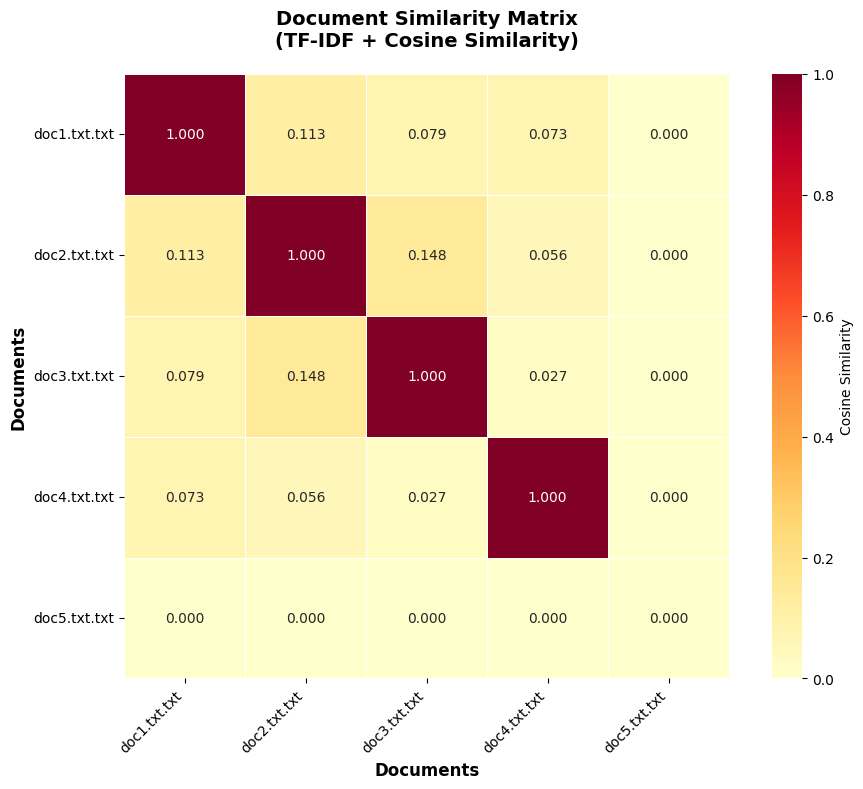

✓ Heatmap created and saved as 'similarity_heatmap.png'



In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix,
    annot=True,
    fmt='.3f',
    cmap='YlOrRd',
    xticklabels=doc_names,
    yticklabels=doc_names,
    cbar_kws={'label': 'Cosine Similarity'},
    square=True,
    linewidths=0.5
)
plt.title('Document Similarity Matrix\n(TF-IDF + Cosine Similarity)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Documents', fontsize=12, fontweight='bold')
plt.ylabel('Documents', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('similarity_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmap created and saved as 'similarity_heatmap.png'\n")

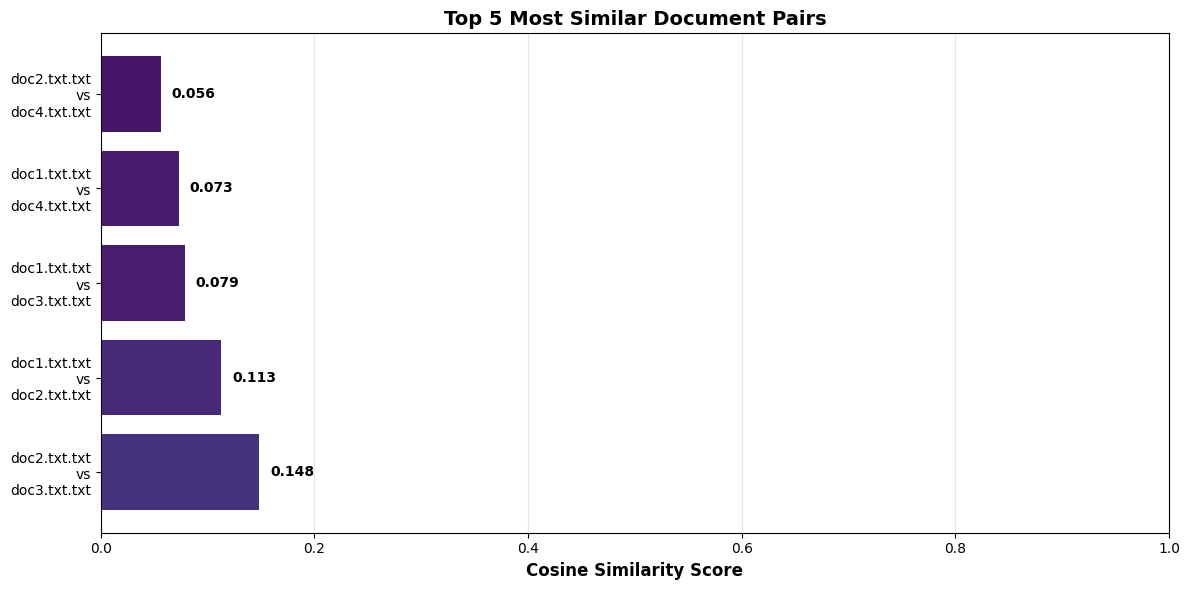

✓ Bar chart created and saved as 'top_similar_pairs.png'



In [16]:
plt.figure(figsize=(12, 6))
top_pairs = pairs[:5]
labels = [f"{p[0]}\nvs\n{p[1]}" for p in top_pairs]
scores = [p[2] for p in top_pairs]
colors = plt.cm.viridis(np.array(scores))

bars = plt.barh(labels, scores, color=colors)
plt.xlabel('Cosine Similarity Score', fontsize=12, fontweight='bold')
plt.title('Top 5 Most Similar Document Pairs', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)


for bar, score in zip(bars, scores):
    plt.text(score + 0.01, bar.get_y() + bar.get_height()/2,
            f'{score:.3f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('top_similar_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Bar chart created and saved as 'top_similar_pairs.png'\n")

In [17]:
print("="*80)
print("STEP 11: Exporting Results")
print("="*80)


df_similarity.to_csv('similarity_matrix.csv')
print("✓ Similarity matrix saved to 'similarity_matrix.csv'")


df_pairs = pd.DataFrame([
    {
        'Document 1': p[0],
        'Document 2': p[1],
        'Similarity Score': f'{p[2]:.4f}',
        'Percentage': f'{p[2]*100:.2f}%'
    }
    for p in pairs
])
df_pairs.to_csv('top_similar_pairs.csv', index=False)
print("✓ Top pairs saved to 'top_similar_pairs.csv'")

STEP 11: Exporting Results
✓ Similarity matrix saved to 'similarity_matrix.csv'
✓ Top pairs saved to 'top_similar_pairs.csv'


In [18]:

for idx, doc_name in enumerate(doc_names):
    top_indices = tfidf_array[idx].argsort()[-20:][::-1]
    top_terms = [(feature_names[i], tfidf_array[idx][i]) for i in top_indices]

    df_terms = pd.DataFrame(top_terms, columns=['Term', 'TF-IDF Score'])
    df_terms.to_csv(f'top_terms_{doc_name}.csv', index=False)

print(f"✓ Term statistics saved for all {len(doc_names)} documents")
print()

✓ Term statistics saved for all 5 documents



In [20]:

print("STEP 12: Summary Report")
print("="*80)

report = []
report.append("\n" + "="*80)
report.append("DOCUMENT SIMILARITY ANALYSIS - SUMMARY REPORT")
report.append("="*80)
report.append(f"\nTotal Documents Analyzed: {len(documents)}")
report.append(f"Vocabulary Size: {len(vectorizer.vocabulary_)} unique terms")
report.append(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

report.append("\n" + "-"*80)
report.append("DOCUMENT LIST:")
for idx, name in enumerate(doc_names, 1):
    report.append(f"  {idx}. {name}")

report.append("\n" + "-"*80)
report.append("TOP 5 SIMILAR DOCUMENT PAIRS:")
for rank, (doc1, doc2, score) in enumerate(pairs[:5], 1):
    report.append(f"\n{rank}. {doc1} ↔ {doc2}")
    report.append(f"   Similarity: {score:.4f} ({score*100:.2f}%)")

report.append("\n" + "-"*80)
report.append("SIMILARITY INTERPRETATION:")
report.append("  • 0.7 - 1.0: High similarity (very related)")
report.append("  • 0.4 - 0.7: Moderate similarity (somewhat related)")
report.append("  • 0.2 - 0.4: Low similarity (minimally related)")
report.append("  • 0.0 - 0.2: Very low similarity (unrelated)")

report.append("\n" + "-"*80)
report.append("METHODOLOGY:")
report.append("  • Vector Space Model with TF-IDF weighting")
report.append("  • Cosine similarity for document comparison")
report.append("  • Text preprocessing: lowercase, stopword removal")
report.append("  • Range: 0 (completely different) to 1 (identical)")

report.append("\n" + "="*80)
report.append("ANALYSIS COMPLETE!")
report.append("="*80)

report_text = "\n".join(report)
print(report_text)


with open('analysis_report.txt', 'w') as f:
    f.write(report_text)

print("\n✓ Full report saved to 'analysis_report.txt'\n")


print("="*80)
print("STEP 13: Download Results")
print("="*80)
print("You can download the following files:")
print("  • similarity_heatmap.png")
print("  • top_similar_pairs.png")
print("  • similarity_matrix.csv")
print("  • top_similar_pairs.csv")
print("  • analysis_report.txt")
print("  • top_terms_*.csv (for each document)")
print()
print("Use the file browser on the left sidebar to download files.")
print("="*80)

# Optional: Create a zip file of all results
print("\nCreating ZIP file of all results...")
!zip -q results.zip *.png *.csv *.txt
print("✓ All results packaged in 'results.zip'")
print("\nYou can download 'results.zip' from the file browser.")
print("\n" + "="*80)
print("PROJECT COMPLETE!")
print("="*80)

STEP 12: Summary Report

DOCUMENT SIMILARITY ANALYSIS - SUMMARY REPORT

Total Documents Analyzed: 5
Vocabulary Size: 330 unique terms
TF-IDF Matrix Shape: (5, 330)

--------------------------------------------------------------------------------
DOCUMENT LIST:
  1. doc1.txt.txt
  2. doc2.txt.txt
  3. doc3.txt.txt
  4. doc4.txt.txt
  5. doc5.txt.txt

--------------------------------------------------------------------------------
TOP 5 SIMILAR DOCUMENT PAIRS:

1. doc2.txt.txt ↔ doc3.txt.txt
   Similarity: 0.1484 (14.84%)

2. doc1.txt.txt ↔ doc2.txt.txt
   Similarity: 0.1128 (11.28%)

3. doc1.txt.txt ↔ doc3.txt.txt
   Similarity: 0.0787 (7.87%)

4. doc1.txt.txt ↔ doc4.txt.txt
   Similarity: 0.0731 (7.31%)

5. doc2.txt.txt ↔ doc4.txt.txt
   Similarity: 0.0562 (5.62%)

--------------------------------------------------------------------------------
SIMILARITY INTERPRETATION:
  • 0.7 - 1.0: High similarity (very related)
  • 0.4 - 0.7: Moderate similarity (somewhat related)
  • 0.2 - 0.4: L